1. 파일 불러서 datagram만들기
2. 결측치 제거
3. 라벨링 그래프 표시(라벨링이 =sex)
pop드랍해도 됨 혹은 숫자로 변환
4. sex를 숫자로 변환
5.Sex 라벨링으로 분리
6. DT LR RF SVM 분류
8. 데이터셋에서 sex 삭제
9. totlenth를 라벨링으로
10. regression DT LR RF SVM 분류


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬 파일에서 데이터 불러오기
data = pd.read_csv("C:/Users/biank/Downloads/possum.csv")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [71]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [72]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [73]:
data.dropna(subset=['age','footlgth'],inplace = True)

In [74]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [75]:
columns = data.columns
print(columns)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [76]:
data=data.drop('Pop', axis=1)

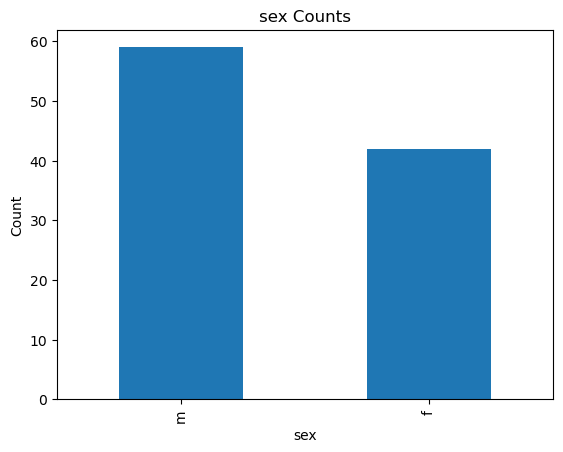

In [77]:
import matplotlib.pyplot as plt

label_counts = data['sex'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('sex Counts')
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['sex']=le.fit_transform(data['sex'])

data.head()

,case,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


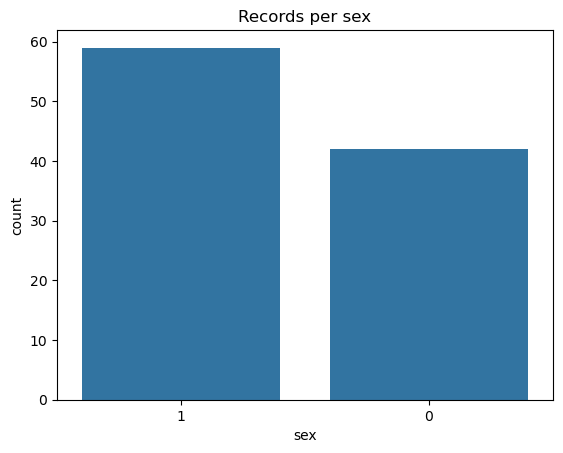

In [79]:
sns.countplot(x = "sex", data = data, palette = [sns.color_palette()[0]],

              order = data.sex.value_counts().index)

plt.title("Records per sex");

In [80]:
from sklearn.model_selection import train_test_split

y = data['sex']
X = data.drop('sex', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 학습용과 테스트용으로 데이터 분할

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_train.shape)

X_train.shape : (75, 12)
y_train.shape : (75,)
X_test.shape: (26, 12)
y_test.shape: (75,)


In [81]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [82]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.6153846153846154


In [83]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.5769230769230769


NameError: name 'confusion_matrix' is not defined

In [84]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6538461538461539


NameError: name 'confusion_matrix' is not defined

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.6923076923076923


NameError: name 'confusion_matrix' is not defined

In [86]:
data.drop(columns=['sex'], inplace = True)

In [87]:
from sklearn.model_selection import train_test_split

y = data['totlngth']
X = data.drop('totlngth', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 학습용과 테스트용으로 데이터 분할

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_train.shape)

X_train.shape : (80, 11)
y_train.shape : (80,)
X_test.shape: (21, 11)
y_test.shape: (80,)


In [92]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [93]:
# SVR 모델 학습 및 예측
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)

In [94]:
# DT 모델 학습 및 예측
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

In [95]:
# RF 모델 학습 및 예측
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

In [96]:
# LR 모델 학습 및 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

In [97]:
print("SVR MSE: ", svm_mse)
print("DT MSE: ", dt_mse)
print("RF MSE: ", rf_mse)
print("LR MSE: ", lr_mse)

SVR MSE:  10.50017483433964
DT MSE:  12.523809523809524
RF MSE:  7.0326567142857055
LR MSE:  5.664768824827701
